In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.6 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 417 kB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 242 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 207 kB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 731 kB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 134 kB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.8 MB/s eta 0:00:01
     |█████████████████████████

SyntaxError: invalid syntax (2773187961.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
f = pd.read_csv("CxCData/bills.csv")
print(f.head())
g = pd.read_csv("CxCData/venues.csv")
print(g.head())

    bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0  2024-07-01 09:17:01              21.81                             0.0   
1  2024-07-01 13:37:00              48.95                             0.0   
2  2024-07-01 11:19:32              26.94                             0.0   
3  2024-07-01 15:05:59               3.96                             0.0   
4  2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2

In [8]:
col = f.columns.tolist()
spec_col = f[['bill_total_billed', 'bill_total_net', 'payment_amount']]
print(col)

['bill_paid_at_local', 'bill_total_billed', 'bill_total_discount_item_level', 'bill_total_gratuity', 'bill_total_net', 'bill_total_tax', 'bill_total_voided', 'bill_uuid', 'business_date', 'order_duration_seconds', 'order_seated_at_local', 'order_closed_at_local', 'order_take_out_type_label', 'order_uuid', 'payment_amount', 'payment_count', 'payment_total_tip', 'sales_revenue_with_tax', 'venue_xref_id', 'waiter_uuid']


In [9]:
def time_format(data):
    data['bill_paid_at_local'] = pd.to_datetime(data['bill_paid_at_local'])
    data['bill_day'] = data['bill_paid_at_local'].dt.day_name()
    return data
new = time_format(f)
print(new.head())

   bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0 2024-07-01 09:17:01              21.81                             0.0   
1 2024-07-01 13:37:00              48.95                             0.0   
2 2024-07-01 11:19:32              26.94                             0.0   
3 2024-07-01 15:05:59               3.96                             0.0   
4 2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2407010

In [10]:
merge = pd.merge(f, g, on="venue_xref_id")
print(merge.head())

   bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0 2024-07-01 09:17:01              21.81                             0.0   
1 2024-07-01 13:37:00              48.95                             0.0   
2 2024-07-01 11:19:32              26.94                             0.0   
3 2024-07-01 15:05:59               3.96                             0.0   
4 2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2407010

In [11]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
merge['bill_day'] = pd.Categorical(merge['bill_day'], categories=day_order, ordered=True)

average_bill_per_day = merge.groupby(['bill_day', 'concept', 'city'])['bill_total_billed'].mean().reset_index()

average_bill_per_day = average_bill_per_day.sort_values(['city', 'concept', 'bill_day'])
print(average_bill_per_day)

/var/folders/87/bsdsmxqs3_bgd08gznskc43w0000gn/T/ipykernel_1065/2432050369.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bill_per_day = merge.groupby(['bill_day', 'concept', 'city'])['bill_total_billed'].mean().reset_index()


        bill_day      concept          city  bill_total_billed
0         Sunday       BAKERY   Mississauga                NaN
5418      Monday       BAKERY   Mississauga                NaN
10836    Tuesday       BAKERY   Mississauga                NaN
16254  Wednesday       BAKERY   Mississauga                NaN
21672   Thursday       BAKERY   Mississauga                NaN
...          ...          ...           ...                ...
16253    Tuesday  SPORTS_CLUB      fountain                NaN
21671  Wednesday  SPORTS_CLUB      fountain                NaN
27089   Thursday  SPORTS_CLUB      fountain                NaN
32507     Friday  SPORTS_CLUB      fountain                NaN
37925   Saturday  SPORTS_CLUB      fountain                NaN

[37926 rows x 4 columns]


Available cities:[' Mississauga', ' Toronto', '.', '1', 'APOPKA', 'Abbotsford', 'Aguadilla ', 'Ajax', 'Albany', 'Albuquerque', 'Aliquippa', 'Allentown', 'Alto Pass ', 'Ancaster', 'Antigo', 'Appleton', 'Ashern', 'Auburn', 'Austin', 'Baker City', 'Baltimore', 'Banff', 'Barrie', 'Bath', 'Bathurst', 'Bedford', 'Belleville', 'Bellingham', 'Bend', 'Berryville', 'Birmingham', 'Blue River', 'Bolton Landing', 'Bonavista', 'Bow Island', 'Brampton', 'Brewster', 'Bridgeport', 'Bristow', 'Brocton', 'Brook', 'Brooklin', 'Brooklyn', 'Buffalo Grove', 'Bulls Gap', 'Burlington', 'Burnaby', 'CALGARY', 'Caguas', 'Calgary', 'Calumet City', 'Cambridge', 'Campbell River', 'Canal Fulton', 'Canmore', 'Canton', 'Cape Dorset', 'Carmi', 'Carrollton', 'Carson City', 'Cave Creek', 'Cedartown', 'Charles Town', 'Charlotte', 'Charlottetown', 'Chatham', 'Cheney', 'Cherry Valley', 'Chester', 'Chicago', 'Chino', 'Chino Hills', 'Christiansted', 'City Of Toronto', 'Clearwater ', 'Clovis', 'Coboconk', 'Cocoa', 'Collingwood'

/var/folders/87/bsdsmxqs3_bgd08gznskc43w0000gn/T/ipykernel_1065/2547049406.py:22: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  legend = plt.legend('Dining Type Location', labels=pivot.columns, loc='upper center', fontsize = 15, bbox_to_anchor=(1.15, 1), frameon=True)


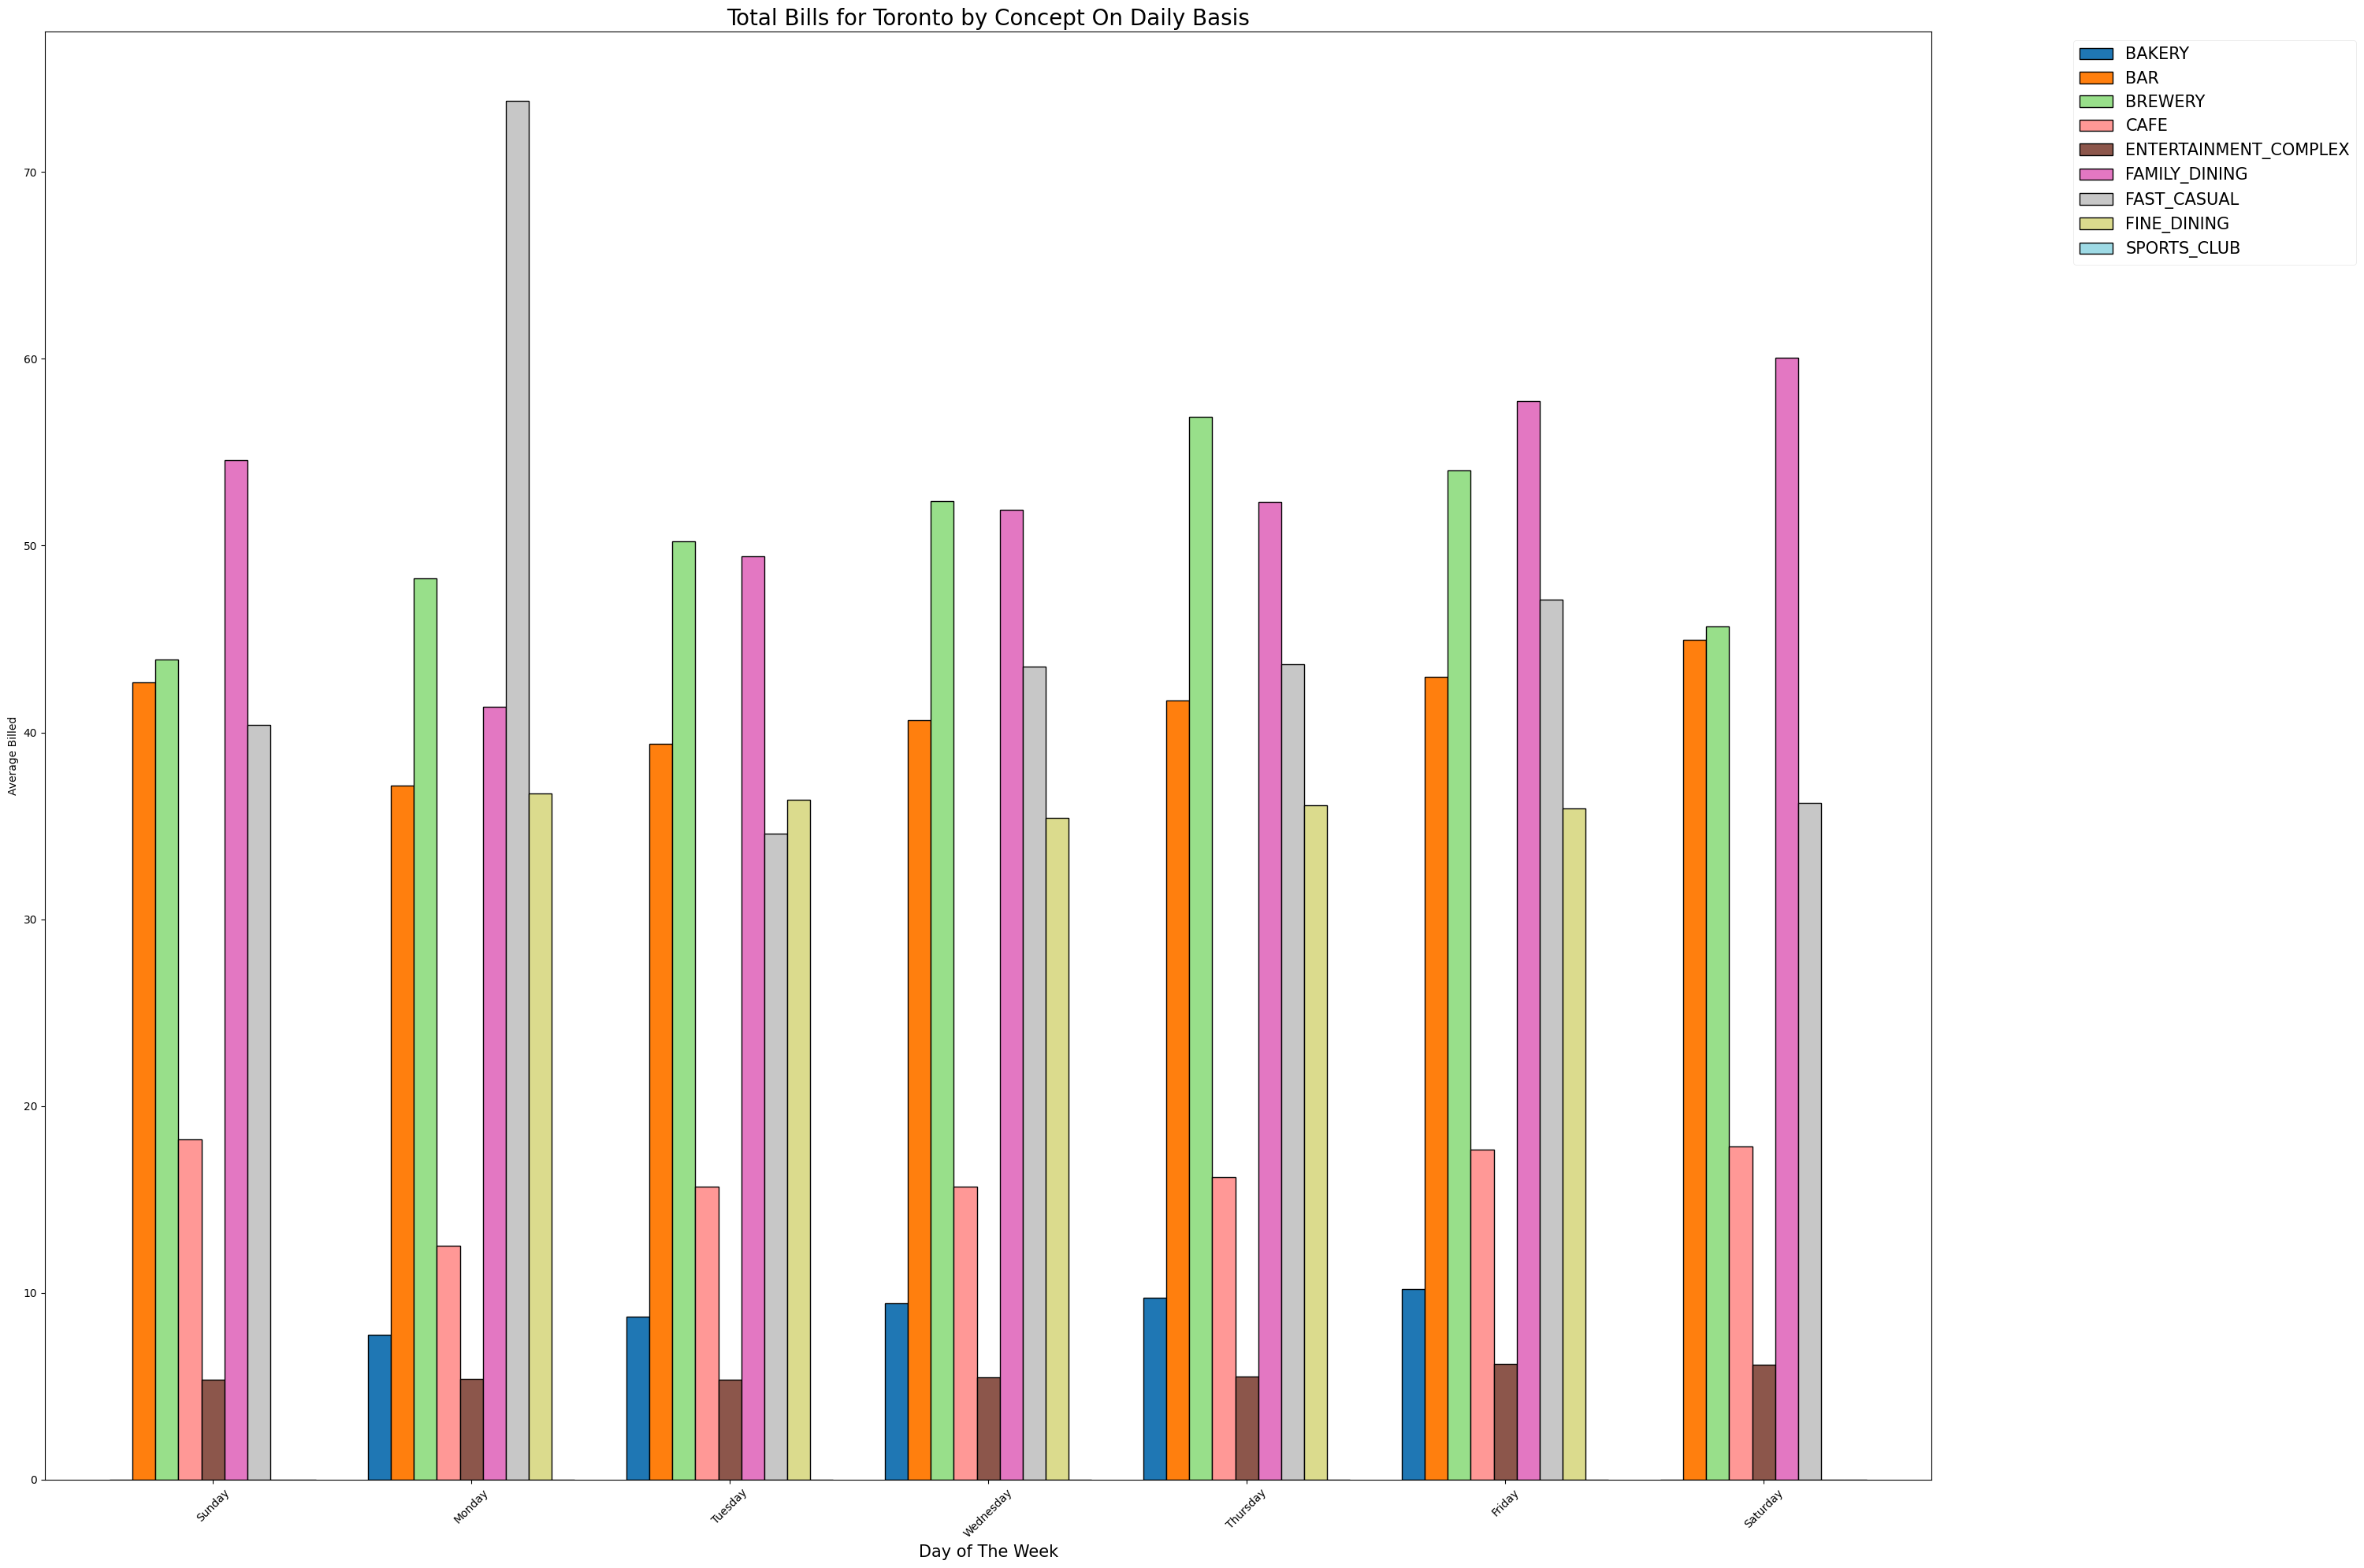

In [13]:
cities = average_bill_per_day['city'].unique()
print(f"Available cities:{list(cities)}")
city_input = input("Enter the city name to access data: ").strip()
if city_input not in cities:
    print("Please Enter a Valid City Name.")
else:
    city_data = average_bill_per_day[average_bill_per_day['city'] == city_input]
    pivot = city_data.pivot(index='bill_day', columns='concept', values='bill_total_billed')
    pivot = pivot.dropna(axis=1, how='all')
    if pivot.empty:
        print(f"No data to plot for {city_input}.")
    else:
        pivot = pivot.sort_index()

    plt.figure(figsize=(30,20))
    pivot.plot(kind='bar', width = 0.8, figsize=(30,20),edgecolor='black', colormap='tab20', ax=plt.gca())
    plt.title(f'Total Bills for {city_input} by Concept On Daily Basis', fontsize = 20)
    plt.xlabel('Day of The Week', fontsize=15)
    plt.ylabel('Average Billed', fontsize=10)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize = 10)
    legend = plt.legend('Dining Type Location', labels=pivot.columns, loc='upper center', fontsize = 15, bbox_to_anchor=(1.15, 1), frameon=True)
    legend.get_frame().set_alpha(0.5)
    legend.get_frame().set_linewidth(0.5)  # Set border thickness
    legend.borderpad = 0.3  # Padding around the legend
    legend.labelspacing = 0.1  # Spacing between legend labels
    legend.handletextpad = 0.2  # Padding between legend handle and text
    plt.tight_layout()
    plt.show()